# **Pepper Leaf Classification**

**About the dataset**

The dataset is from kaggle viz. Plant Village

Link of the dataset-https://www.kaggle.com/datasets/arjuntejaswi/plant-village

This dataset has leaf images of tomato, pepper, potato. I would be only taking into consideration pepper images for this project.

We are supposed to predict the pepper plant's health from the leaf image of the plant. The dataset's images are classified into 2 categories.

1. Bacterial Spot
2. Healthy

I have restructured the dataset into the below format:

Images_Floder
  CLASS A
    Class A images
  CLASS B
    Class B images
  .................

So that I can use the tf.keras.utils.image_dataset_from_directory for inputing the data.

In [2]:
# Importing the necessary libraries.

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## Transfer Learning

I would not be training a CNN model from scratch. I would use the already trained CNN model(model on potato images) to train this classifier.

In [3]:
# Loading the already trained model.

model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Deep_learning_project-potato_classifier/best_model')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        3

In [4]:
# Training all the parameters on top of the loaded model.

model.trainable = True

In [33]:
# Changing the last layer.

base_input = model.layers[0].input
base_output = model.layers[-2].output
output = layers.Dense(1,activation = 'sigmoid')(base_output)
revised_model = keras.Model(base_input,output)
revised_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_input (InputLayer)  [(None, 256, 256, 3)]    0         
                                                                 
 resizing (Resizing)         (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                       

## **Loading the data.**

In [12]:
# Loading the train dataset.

ds_train = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Deep_learning_project_pepper_classifier/Pepper_images',
    labels = 'inferred',
    label_mode = 'int',
    color_mode = 'rgb',
    batch_size = None,
    image_size = (256,256),
    shuffle = True,
    seed = 10,
    validation_split = .20,
    subset = 'training'
)

Found 2475 files belonging to 2 classes.
Using 1980 files for training.


In [13]:
# Loading the validation dataset.

ds_validation = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Deep_learning_project_pepper_classifier/Pepper_images',
    labels = 'inferred',
    label_mode = 'int',
    color_mode = 'rgb',
    batch_size = None,
    image_size = (256,256),
    shuffle = True,
    seed = 10,
    validation_split = .20,
    subset = 'validation'
)

Found 2475 files belonging to 2 classes.
Using 495 files for validation.


In [23]:
# Extracting a image for healthy and bacterial image.

for image,label in ds_validation.take(len(ds_validation)):
  if label == tf.constant(0,dtype = tf.int32):
    bacteria_image = image, label
    break

for image,label in ds_validation.take(len(ds_validation)):
  if label == tf.constant(1,dtype = tf.int32):
    healthy_image = image, label
    break

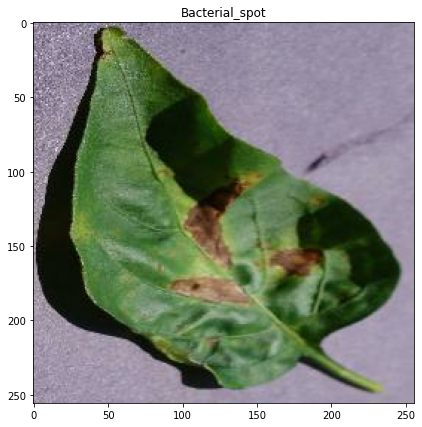

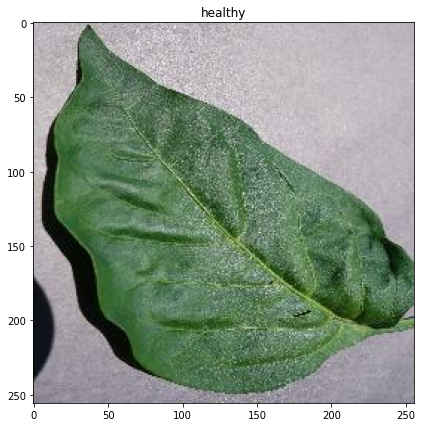

In [24]:
# Plotting the bacteria and healthy leaf.

image_list = [bacteria_image,healthy_image]
for image in image_list:
  fig = plt.figure(figsize = (10,7))
  ax = plt.gca()
  plt.imshow(image[0].numpy().astype('int32'))
  plt.title(ds_train.class_names[image[1].numpy().astype('int32')])

## Preprocessing of Train and Validation data.

In [25]:
# Creating a function to normalize data.

def normalize(image,label):
  return tf.cast(image,tf.float32) / 255.0, label

In [26]:
# Preprocessing of train data.

AUTOTUNE = tf.data.experimental.AUTOTUNE

ds_train = ds_train.batch(64)
ds_train = ds_train.map(normalize)
ds_train = ds_train.prefetch(AUTOTUNE)
ds_train = ds_train.cache()

In [27]:
# Preprocessing of validation data.

ds_validation = ds_validation.batch(64)
ds_validation = ds_validation.map(normalize)
ds_validation = ds_validation.prefetch(AUTOTUNE)

## Model Building

In [34]:
revised_model.compile(loss = keras.losses.BinaryCrossentropy(),
                      optimizer = keras.optimizers.Adam(),
                      metrics = ['accuracy'])

In [36]:
history = revised_model.fit(ds_train,epochs = 5, batch_size = 64, verbose = 'auto')

Epoch 1/5
31/31 [==============================] - 296s 10s/step - loss: 0.1192 - accuracy: 0.9702
Epoch 2/5
31/31 [==============================] - 294s 9s/step - loss: 0.0615 - accuracy: 0.9879
Epoch 3/5
31/31 [==============================] - 296s 10s/step - loss: 0.0337 - accuracy: 0.9929
Epoch 4/5
31/31 [==============================] - 299s 10s/step - loss: 0.0224 - accuracy: 0.9944
Epoch 5/5
31/31 [==============================] - 305s 10s/step - loss: 0.0155 - accuracy: 0.9929


Text(0.5, 1.0, 'accuracy at every epoch')

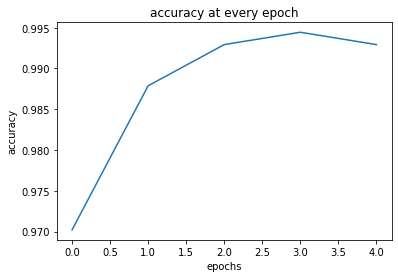

In [37]:
# Let us plot the training accuraries at every epoch.

acc_at_epoch = history.history['accuracy']
plt.plot(acc_at_epoch)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy at every epoch')

Text(0.5, 1.0, 'loss at every epoch')

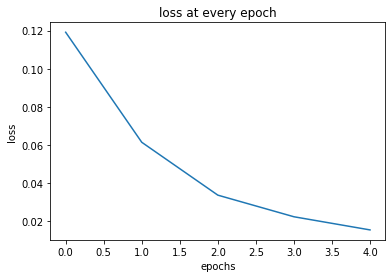

In [38]:
# Let us plot the training loss at every epoch.

loss_at_epoch = history.history['loss']
plt.plot(loss_at_epoch)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss at every epoch')

In [39]:
# Evaluating on ds_validation

revised_model.evaluate(ds_validation)

8/8 [==============================] - 24s 3s/step - loss: 0.0283 - accuracy: 0.9859


[0.02833179384469986, 0.9858585596084595]

In [40]:
# Saving the model.

revised_model.save('/content/drive/MyDrive/Colab Notebooks/Deep_learning_project_pepper_classifier/best_model')